# GSE188511
## Xiaonan Wang
## 13Nov2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.7.1 anndata==0.7.8 umap==0.5.1 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE188511/'

In [9]:
Files = [x for x in listdir(FileDir) if 'GSM' in x]
print(Files)
PreF = np.unique([re.findall('(.*_.*)_.*',x)[0] for x in Files])
print(PreF)
print(len(PreF))

['GSM5684355_wildtype_barcodes.tsv.gz', 'GSM5684355_wildtype_features.tsv.gz', 'GSM5684355_wildtype_matrix.mtx.gz', 'GSM5684356_mutant_barcodes.tsv.gz', 'GSM5684356_mutant_features.tsv.gz', 'GSM5684356_mutant_matrix.mtx.gz', 'GSM5684357_Uninjured_barcodes.tsv.gz', 'GSM5684357_Uninjured_features.tsv.gz', 'GSM5684357_Uninjured_matrix.mtx.gz', 'GSM5684358_Injured_barcodes.tsv.gz', 'GSM5684358_Injured_features.tsv.gz', 'GSM5684358_Injured_matrix.mtx.gz']
['GSM5684355_wildtype' 'GSM5684356_mutant' 'GSM5684357_Uninjured'
 'GSM5684358_Injured']
4


In [5]:
# sorted EGFP+ pdgfrb lineage
meta = pd.DataFrame([['GSM5684355', '6m', 'adult', 'Healthy', '7', 'Tg(pdgfrb:EGFP; cxcl12b:Citrine; fli1a:DsRed)', 'ventricle', 'GSE188511', 'mural cells', 'WT', 'Danio rerio', 'mixed', 'Kapuria'],
                   ['GSM5684356', '6m', 'adult', 'Healthy', '7', 'Tg(pdgfrb:EGFP; cxcl12b:Citrine; fli1a:DsRed); pdgfrb-/- (um148 allele)', 'ventricle', 'GSE188511', 'mural cells', 'pdgfrb-/-', 'Danio rerio', 'mixed', 'Kapuria'],
                     ['GSM5684357', '18m', 'adult', 'Healthy', '7', 'Tg(pdgfrb:EGFP; cxcl12b:Citrine)', 'ventricle', 'GSE188511', 'mural cells', 'WT', 'Danio rerio', 'mixed', 'Kapuria'],
                   ['GSM5684358', '18m', 'adult', 'Injured', '7', 'genotype: Tg(pdgfrb:EGFP; cxcl12b:Citrine)', 'ventricle', 'GSE188511', 'mural cells', 'WT', 'Danio rerio', 'mixed', 'Kapuria']
                    ], columns = ['Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author'])

In [13]:
adata = []
for idx, row in meta.iterrows():
    FN = [x for x in PreF if row['Index'] in x][0]
    print(FN)
    FN = FN + '_'
    adata_sub = sc.read_10x_mtx(FileDir, prefix=FN, cache=True)
    adata_sub.obs['Index'] = row['Index']
    adata_sub.obs['Age'] = row['Age']
    adata_sub.obs['Development_stage'] = row['Development_stage']
    adata_sub.obs['Condition'] = row['Condition']
    adata_sub.obs['Day'] = row['Day']
    adata_sub.obs['Strain'] = row['Strain']
    adata_sub.obs['Tissue'] = row['Tissue']
    adata_sub.obs['StudyID'] = row['StudyID']
    adata_sub.obs['CellType'] = row['CellType']
    adata_sub.obs['Genotype'] = row['Genotype']
    adata_sub.obs['Organism'] = row['Organism']
    adata_sub.obs['Gender'] = row['Gender']
    adata_sub.obs['Author'] = row['Author']
    if 'EGFP' in adata_sub.var_names:
        adata_sub.obs['EGFP'] = adata_sub[:,'EGFP'].X.toarray().flatten()
        adata_sub = adata_sub[:, ~np.in1d(adata_sub.var_names, 'EGFP')].copy()
    if 'Citrine' in adata_sub.var_names:
        adata_sub.obs['Citrine'] = adata_sub[:,'Citrine'].X.toarray().flatten()
        adata_sub = adata_sub[:, ~np.in1d(adata_sub.var_names, 'Citrine')].copy()
    if 'DsRedEx' in adata_sub.var_names:
        adata_sub.obs['DsRedEx'] = adata_sub[:,'DsRedEx'].X.toarray().flatten()
        adata_sub = adata_sub[:, ~np.in1d(adata_sub.var_names, 'DsRedEx')].copy()
    adata_sub.var_names_make_unique()
    adata.append(adata_sub)
    del adata_sub

... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE188511-GSM5684355_wildtype_matrix.h5ad


GSM5684355_wildtype


... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE188511-GSM5684356_mutant_matrix.h5ad


GSM5684356_mutant


... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE188511-GSM5684357_Uninjured_matrix.h5ad


GSM5684357_Uninjured


... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE188511-GSM5684358_Injured_matrix.h5ad


GSM5684358_Injured


In [15]:
adata

[AnnData object with n_obs × n_vars = 1338 × 25107
     obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'EGFP', 'Citrine', 'DsRedEx'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 1504 × 25107
     obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'EGFP', 'Citrine', 'DsRedEx'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 5826 × 25107
     obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'EGFP', 'Citrine', 'DsRedEx'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 3127 × 25107
     obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organis

# QC

In [16]:
[x for x in adata[0].var_names if x.startswith('mt-')]

['mt-nd1',
 'mt-nd2',
 'mt-co1',
 'mt-co2',
 'mt-atp8',
 'mt-atp6',
 'mt-co3',
 'mt-nd3',
 'mt-nd4l',
 'mt-nd4',
 'mt-nd5',
 'mt-nd6',
 'mt-cyb']

In [17]:
for i in range(len(adata)):
    adata[i].var['mt'] = adata[i].var_names.str.startswith('mt-') 
    sc.pp.calculate_qc_metrics(adata[i], qc_vars=['mt'], inplace=True)

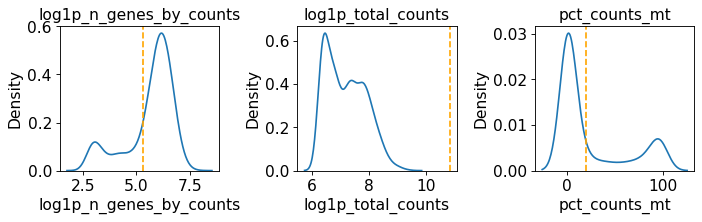

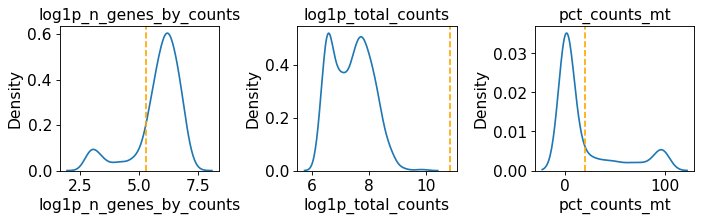

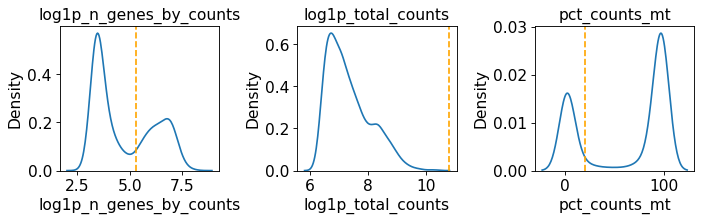

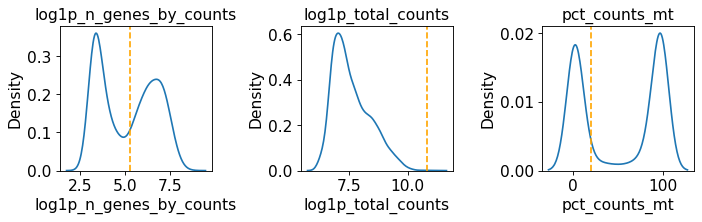

In [25]:
cutoffs = [[200,50000, np.exp(20)],
           [200,50000, np.exp(20)],
           [200,50000, np.exp(20)],
           [200,50000, np.exp(20)]
           ]
for i in range(len(adata)):
    obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
    fig,ax = plt.subplots(1,3, figsize=(9,3))
    for j in range(len(obs_terms)):
        sns.kdeplot(adata[i].obs[obs_terms[j]], ax=ax[j])
        ax[j].grid(False)
        ax[j].set_title(obs_terms[j])
        ax[j].axvline(np.log1p(cutoffs[i][j]), c='orange', linestyle='--')
    plt.tight_layout()

In [26]:
for i in range(len(adata)):
    sc.pp.filter_cells(adata[i], min_genes=cutoffs[i][0])
    #sc.pp.filter_genes(adata[i], min_cells=1)
    adata[i] = adata[i][(adata[i].obs['total_counts'] <= cutoffs[i][1]) & (adata[i].obs['pct_counts_mt'] <= np.log(cutoffs[i][2])), :].copy()
    print(adata[i].obs['Condition'].value_counts().sort_index())

filtered out 322 cells that have less than 200 genes expressed
filtered out 261 cells that have less than 200 genes expressed
filtered out 3591 cells that have less than 200 genes expressed
filtered out 1570 cells that have less than 200 genes expressed


Healthy    929
Name: Condition, dtype: int64
Healthy    1093
Name: Condition, dtype: int64
Healthy    1966
Name: Condition, dtype: int64
Injured    1372
Name: Condition, dtype: int64


In [27]:
for i in range(len(adata)):
    print(adata[i].shape)

(929, 25107)
(1093, 25107)
(1966, 25107)
(1372, 25107)


In [28]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata) #, join='outer', fill_value=0

In [29]:
adata1.shape

(5360, 25107)

In [30]:
sc.pp.filter_genes(adata1, min_cells=1)

filtered out 6204 genes that are detected in less than 1 cells


In [32]:
adata1.write('./write/GSE188511_raw.h5ad')

# Normalisation

In [34]:
adata = sc.read('./write/GSE188511_raw.h5ad')

In [35]:
print(adata.shape)

(5360, 18903)


In [36]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [37]:
# log counts
sc.pp.log1p(adata)

In [38]:
adata.raw = adata

In [39]:
print(adata.shape)

(5360, 18903)


In [40]:
adata.write('./write/GSE188511_lognorm.h5ad')

# Cell Cycle Assignment

In [41]:
adata = sc.read('./write/GSE188511_lognorm.h5ad')

In [42]:
print(adata.shape)

(5360, 18903)


In [43]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [44]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print(len(s_genes))
print(len(g2m_genes))

43
54


In [45]:
GN = pd.read_csv('../drerio_mmusculus.txt', delimiter='\t', index_col=0)

In [46]:
GN.head(3)

,external_gene_name,mmusculus_homolog_ensembl_gene,mmusculus_homolog_associated_gene_name
ensembl_gene_id,,,
ENSDARG00000063344,fam162a,ENSMUSG00000019909,Fam162b
ENSDARG00000097685,si:ch211-235i11.3,NaN,NaN
ENSDARG00000036008,caly,ENSMUSG00000025468,Caly


In [47]:
SGo = np.intersect1d(s_genes, [str(x) for x in GN['mmusculus_homolog_associated_gene_name']])
Stab = GN[np.in1d([str(x) for x in GN['mmusculus_homolog_associated_gene_name']], SGo)]
G2Mo = np.intersect1d(g2m_genes, [str(x) for x in GN['mmusculus_homolog_associated_gene_name']])
G2Mtab = GN[np.in1d([str(x) for x in GN['mmusculus_homolog_associated_gene_name']], G2Mo)]

In [48]:
sg_drerio = np.unique([str(x) for x in Stab['external_gene_name']])
g2mg_drerio = np.unique([str(x) for x in G2Mtab['external_gene_name']])
print(len(sg_drerio))
print(len(g2mg_drerio))

40
51


In [49]:
sg_drerio_ol = np.intersect1d(sg_drerio, adata.raw.var_names)
g2mg_drerio_ol = np.intersect1d(g2mg_drerio, adata.raw.var_names)
print(len(sg_drerio_ol))
print(len(g2mg_drerio_ol))

39
50


In [50]:
Index = adata.obs['Index'].cat.categories
print(Index)

Index(['GSM5684355', 'GSM5684356', 'GSM5684357', 'GSM5684358'], dtype='object')


In [51]:
phase = []
for i in range(len(Index)):
    adata_sub = adata[adata.obs['Index'] == Index[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=sg_drerio, g2m_genes=g2mg_drerio, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(929, 18903)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    480 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
calculating cell cycle phase
computing score 'S_score'


(1093, 18903)


    finished: added
    'S_score', score of gene set (adata.obs).
    519 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(1966, 18903)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    719 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    756 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(1372, 18903)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    757 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    839 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [52]:
phase_pd = pd.concat(phase)

In [53]:
phase_pd.head()

,phase,S_score,G2M_score
AAACCCAGTGCGCTCA-1-0,S,0.037615,0.016936
AAACGAAGTATACCCA-1-0,G1,-0.012636,-0.031905
AAAGGATGTATTGAGA-1-0,G1,-0.022105,-0.009920
AAAGGATGTTCAAACC-1-0,G2M,-0.012689,0.014393
AAAGGGCGTCGTATGT-1-0,G1,-0.077207,-0.010994


In [54]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highhly variable genes

In [56]:
adata = sc.read('./write/GSE188511_lognorm.h5ad')

In [57]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [58]:
adata.obs.head(3)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,...,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,batch,n_counts,phase,S_score,G2M_score
AAACCCAGTGCGCTCA-1-0,GSM5684355,6m,adult,Healthy,7,Tg(pdgfrb:EGFP; cxcl12b:Citrine; fli1a:DsRed),ventricle,GSE188511,mural cells,WT,...,100.000000,2.0,1.098612,0.209424,295,0,955.0,S,0.037615,0.016936
AAACGAAGTATACCCA-1-0,GSM5684355,6m,adult,Healthy,7,Tg(pdgfrb:EGFP; cxcl12b:Citrine; fli1a:DsRed),ventricle,GSE188511,mural cells,WT,...,98.741822,3.0,1.386294,0.150981,525,0,1987.0,G1,-0.012636,-0.031905
AAAGGATGTATTGAGA-1-0,GSM5684355,6m,adult,Healthy,7,Tg(pdgfrb:EGFP; cxcl12b:Citrine; fli1a:DsRed),ventricle,GSE188511,mural cells,WT,...,100.000000,281.0,5.641907,17.228695,403,0,1631.0,G1,-0.022105,-0.009920


In [59]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


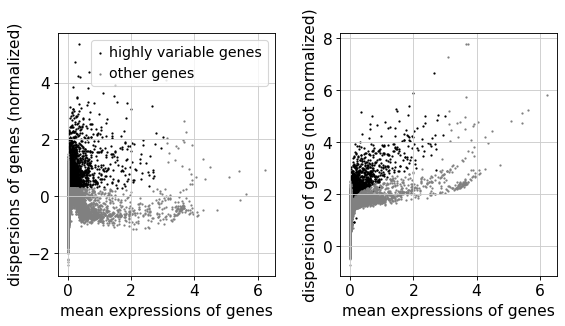

In [60]:
sc.pl.highly_variable_genes(adata)

In [61]:
print(np.sum(adata.var.highly_variable))

4176


In [62]:
adata = adata[:, adata.var.highly_variable].copy()

In [63]:
adata.write('./write/GSE188511_lognorm_hvg.h5ad')

# Preliminary processing

In [64]:
adata = sc.read('./write/GSE188511_lognorm_hvg.h5ad')

In [65]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:07)


In [66]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


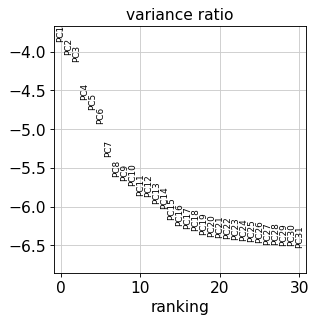

In [67]:
sc.pl.pca_variance_ratio(adata, log=True)

In [68]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [69]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


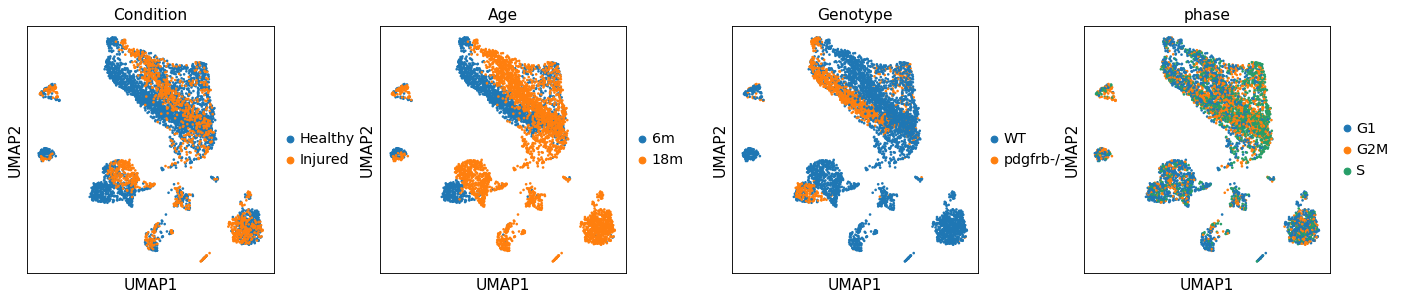

In [72]:
sc.pl.umap(adata, color= ['Condition', 'Age', 'Genotype', 'phase'], wspace=0.3)

In [71]:
adata.write('./write/GSE188511_processed.h5ad')